### Q) Do the following on titanic dataset
### 1. Load the dataset into python environment
### 2. Make ‘PassengerId’ as the index column
### 3. Check the basic details of the dataset
### 4. Fill in all the missing values present in all the columns in the dataset
### 5. Check and handle outliers in at least 3 columns in the dataset
### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

*************

### 1. Load the dataset into python environment, 
### 2. Make ‘PassengerId’ as the index column

In [460]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [461]:
# loading the dataset into the dataframe 'data' and making ‘PassengerId’ as the index column
data = pd.read_csv('C:/Users/Lenovo/Assignment/assignment 5/DATA/titanic_dataset.csv', index_col='PassengerId')

In [462]:
# display the first 5 rows of the dataframe
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [463]:
# Print information about the dataframe 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


~ the columns 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' are of type object and are categorical columns.

~ It is having 891 rows

In [464]:
# number of null values in the dataframe 'data'
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

~ The columns 'Age', 'Cabin' and 'Embarked' are having 177, 687 and 2 null values

In [465]:
# to find the percentage of missing values
data.isnull().sum()*100/len(data) 

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

~ For 'Cabin' column from the dataframe , 77.104377 % of the data are null values, dropping that column from the dataframe will be the best option. If  the null values of  'Cabin' column are filled with mode, there is a chance for biasing  in our data set.


In [466]:
# dropping 'Cabin' column from the dataframe 'data'
data.drop('Cabin', axis=1, inplace = True)


In [467]:
# displaying the first 5 rows of the dataframe after dropping 'Cabin' column
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [468]:
# number of rows and columns of the dataframe 'data'
data.shape

(891, 10)

~It is having 891 rows and 10 columns

In [469]:
# display the summary statistics of all numerical columns
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [470]:
# display the summary statistics of categorical columns
data.describe(include=['O']) 

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


In [471]:
# count of the number of paasengers survived
data.groupby(['Survived']).agg({'Survived' :['count']})

,Survived
,count
Survived,
0,549
1,342


In [472]:
# count of the number of paasengers survived for males and females
data.groupby(['Sex','Survived']).agg({'Survived' :['count']}) 

Survived
                   count
Sex    Survived         
female 0              81
       1             233
male   0             468
       1             109

~ 342 passengers only survived, out of which 233 are females and 109 are males

In [473]:
# display the details of passengers travelling alone [SibSp == 0.0000, Parch == 0.0000]
data.loc[(data.SibSp == 0.0000) & (data.Parch == 0.0000)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


~ 537 passengers out of 891 passengers are travelling alone

In [474]:
# chance of survival by 'Pclass'
data.groupby(['Pclass','Survived']).agg({'Survived' :['count']}) 

Survived
                   count
Pclass Survived         
1      0              80
       1             136
2      0              97
       1              87
3      0             372
       1             119

~First class (Pclass=1) passengers had a much better chance of survival than second class (Pclass=2) travellers

In [475]:
# chance of survival by 'Pclass' and 'Sex'
data.groupby(['Pclass', 'Sex','Survived']).agg({'Survived' :['count']}) 

Survived
                          count
Pclass Sex    Survived         
1      female 0               3
              1              91
       male   0              77
              1              45
2      female 0               6
              1              70
       male   0              91
              1              17
3      female 0              72
              1              72
       male   0             300
              1              47

~Within each 'Pclass', females had a much better chance of survival than males

In [476]:
# chance of survival by 'SibSp'
data.groupby(['SibSp','Survived']).agg({'Survived' :['count']}) 

Survived
                  count
SibSp Survived         
0     0             398
      1             210
1     0              97
      1             112
2     0              15
      1              13
3     0              12
      1               4
4     0              15
      1               3
5     0               5
8     0               7

~SibSp : No. of siblings & spouses aboard. 

~ As SibSp increases , the chances of survival is becoming less. Greater chances of survival for passengers travelling  without any siblings & spouses aboard.

In [477]:
# chance of survival by 'Parch'
data.groupby(['Parch','Survived']).agg({'Survived' :['count']}) 

Survived
                  count
Parch Survived         
0     0             445
      1             233
1     0              53
      1              65
2     0              40
      1              40
3     0               2
      1               3
4     0               4
5     0               4
      1               1
6     0               1

~ parch:   number of parents / children aboard the Titanic.

~ Greater chances of survival for passengers travelling without any parents / children aboard.

In [478]:
# chance of survival by port of 'embarkation'
data.groupby(['Embarked','Survived']).agg({'Survived' :['count']}) 

Survived
                     count
Embarked Survived         
C        0              75
         1              93
Q        0              47
         1              30
S        0             427
         1             217

~ Passengers embarking at 'S' had the best chance of survival than those who embarked at 'Q'.

In [479]:
# number of unique values present in 'Ticket' column
data['Ticket'].nunique()

681

In [480]:
# to check for duplicate tickets and their size 
data.groupby('Ticket').size()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64

In [481]:
# display the rows having the same Ticket 
data[data.duplicated(subset='Ticket')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,S
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,S
...,...,...,...,...,...,...,...,...,...,...
877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S


In [482]:
# count the number of tickets having ticket = 'LINE'
data.loc[data.Ticket == 'LINE'].groupby('Ticket').agg({'Ticket' : ['count']}) 

,Ticket
,count
Ticket,
LINE,4


~ 4 tickets  = LINE in the dataset

~ There are many duplicate values in the ticket column

~ There are 891 rows in the dataframe, out of which 'Ticket' column is having 681 unique values, so not going to consider it as a feature. Hence duplicate values in 'Ticket' column are not removed from the dataframe.

In [483]:
# count the number of people having Fare = 0.0
data.loc[data.Fare == 0.0].groupby('Fare').agg({'Fare' : ['count']}) 

,Fare
,count
Fare,
0.0,15


~ 15 passengers having Fare = 0.0

In [484]:
# displaying the rows where Fare = 0.0
data.loc[(data.Fare == 0.0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S


~ there are 15 passengers with 'Fare' = 0.0, from 'Pclass' = 1, 2, 3 which means that 0.0 as fare have been marked for missing fare values. All of them were having 'Embarked' = S

### 4. Fill in all the missing values present in all the columns in the dataset

In [485]:
# number of null values in the dataframe 'data'
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

~ The columns 'Age'  and 'Embarked' are having 177 and 2 null values

##### 'Age' column

In [486]:
# displays rows having missing values in 'Age' column
missing_age = data[data['Age'].isna()]
missing_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


In [487]:
#  extract the title (Mr. Miss. Mrs. etc.) from the name & save it in a new 'Title' column
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title']

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 891, dtype: object

In [488]:
# display unique values present in 'Title' column
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [489]:
# count of missing age values for each Title
data.loc[data['Age'].isna()].groupby('Title').agg({'Title' : ['count']}) 

,Title
,count
Title,
Dr,1
Master,4
Miss,36
Mr,119
Mrs,17


~ Narrowing these titles  to 4 - Mr, Mrs, Miss, Master:

Replace ['Capt', 'Col', 'Don','Jonkheer','Major','Rev','Sir'] with 'Mr' (as all are male titles)

Replace ['Countess','Dona','Lady'] with 'Mrs'

Replace ['Mlle','Ms','Mme'] with 'Miss'

Replace [Title = 'Dr' and Sex = 'female'] with 'Mrs'

Replace [Title = 'Dr' and Sex = 'male'] with 'Mr'

In [490]:
# replacing Title such as  'Capt', 'Col', 'Don','Jonkheer','Major','Rev','Sir' with 'Mr'
# replacing Title such as  'Countess','Dona','Lady' with 'Mrs'
# replacing Title such as  'Mlle','Ms','Mme' with 'Miss'

# creating filter for male titles
male_titles = ['Capt', 'Col', 'Don','Jonkheer','Major','Rev','Sir'] 

# creating filter for female titles
female_titles = ['Countess','Dona','Lady']

# creating filter for Miss titles
miss_titles = ['Mlle','Ms','Mme']


for df1 in [data]:
    # replacing function for 'Miss'
    df1['Title'] = df1['Title'].replace(miss_titles, 'Miss') 
    
    # replacing function for 'Mrs'
    df1['Title'] = df1['Title'].replace(female_titles, 'Mrs') 
    
    # replacing function for 'Mr'
    df1['Title'] = df1['Title'].replace(male_titles, 'Mr') 
    
    # creating filter for Title 'Dr' and Sex 'male'
    male_dr_filter = (df1.Title == 'Dr') & (df1.Sex == 'male')
    
    # creating filter for Title 'Dr' and Sex 'female'
    female_dr_filter = (df1.Title == 'Dr') & (df1.Sex == 'female')
    
    # locate the rows where the created filter is satisfied and put 'Title' as 'Mr'
    df1.loc[male_dr_filter, ['Title']] = 'Mr'
    
     # locate the rows where the created filter is satisfied and put 'Title' as 'Mrs'
    df1.loc[female_dr_filter, ['Title']] = 'Mrs'

In [491]:
# creating a new dataframe where age is not null
notnull_age = data[data['Age'].notnull()]
notnull_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,Mrs
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Mr
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss


In [492]:
# grouping the 'not null_age' dataframe by 'Title' and finding out the mode of 'Age'
mode_age = notnull_age.groupby(['Title'])['Age'].agg(lambda x: pd.Series.mode(x)[0])
mode_age

Title
Master     1.0
Miss      18.0
Mr        19.0
Mrs       24.0
Name: Age, dtype: float64

In [493]:
# storing the mode of 'Age' of each 'Title' in a dataframe
titleage_mode = pd.DataFrame(mode_age)
titleage_mode

,Age
Title,
Master,1.0
Miss,18.0
Mr,19.0
Mrs,24.0


~  Using mode to fill in all the missing values under 'Age' column which is grouped by 'Title'

In [494]:
# replace the missing values of 'Age' from the  dataframe with mode of age for each 'Title'
for df2, agemode in zip([data],[titleage_mode]):
    for title in ['Master','Miss','Mr','Mrs']:
        df2.loc[((df2['Title'] == title) & (df2['Age'].isnull())),['Age']] = agemode.loc[title][0]

In [495]:
# number of missing values in 'Age' column
data['Age'].isnull().sum()

0

In [496]:
# dropping the 'Title' column from the dataframe
data.drop('Title', axis=1, inplace = True)

##### 'Embarked' column

In [497]:
# displaying the mode of 'Embarked' column 
data['Embarked'].mode()[0]

'S'

In [498]:
# filling missing values in 'Embarked' column with mode since it is a categorical column
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [499]:
# number of null values in the dataframe 'data'
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

~ From the above display, there are no null values in the dataframe

##### 'Fare' column
~ there are 15 passengers with 'Fare' = 0.0, from 'Pclass' = 1, 2, 3 which means that 0.0 as fare have been marked for missing fare values. All of them were having 'Embarked' = S

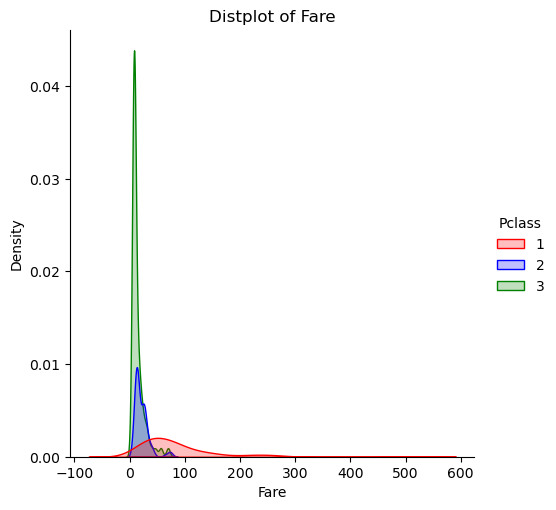

In [572]:
# plotting the Distplot of 'Fare' column
sns.displot(data, x='Fare', hue='Pclass', kind="kde", fill=True, palette=['red', 'blue', 'green']);

# plotting the title as "Distplot of Fare"
plt.title("Distplot of Fare")

# display figures
plt.show()

~ The above Distplot of 'Fare' column is right skewed, so using median to fill in all the zero values under 'Fare' column since mean is affected by extreme values.

In [501]:
# finding the median of 'Fare' column for each 'Pclass' 
median_fare = data.loc[data.Fare != 0.0][['Pclass','Fare']].groupby(['Pclass']).median()

# display the median of 'Fare' column for each 'Pclass' 
median_fare

,Fare
Pclass,
1,61.9792
2,15.0229
3,8.0500


In [502]:
# to  replace the 0.0 values in fare with median of fare for each 'Pclass'
for df3, table in zip([data],[median_fare]):
    for cl in np.unique(df3.Pclass):
        df3.loc[((df3.Fare == 0.0) & (df3.Pclass == cl)), ['Fare']] = table.loc[cl][0]

In [503]:
# provide statistics for 'Fare' column
data['Fare'].describe()

count    891.000000
mean      32.689318
std       49.611639
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [504]:
# number of unique values present in each column
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [505]:
# display unique values present in 'SibSp' column
data['SibSp'].unique() 

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [506]:
# display unique values present in 'Parch' column
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

### 5. Check and handle outliers in at least 3 columns in the dataset
~checking outliers for 'Age', 'Fare', 'SibSp'

##### 'Outliers' in 'Age' column

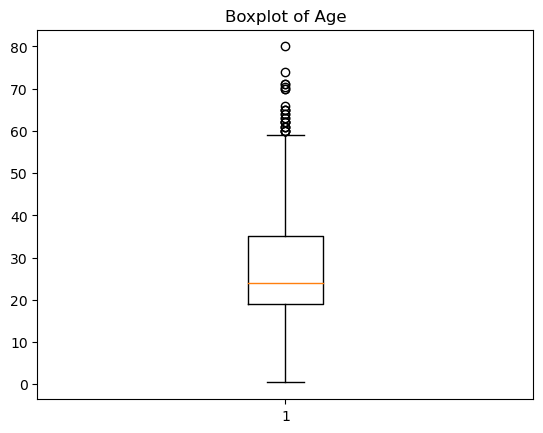

In [507]:
# Boxplot of 'Age' column to check outliers
plt.boxplot(data['Age'])

# plotting the title as "Boxplot of Age"
plt.title("Boxplot of Age")

# display figures
plt.show()

~ lot of outliers  present above the upper whisker of 'Age' column 

First, Second and Third Quartile of 'Age' column

In [508]:
# First Quartile of 'Age' column
Q1_age = np.percentile(data['Age'], 25, interpolation='midpoint')
f"First Quartile of 'Age' column = {Q1_age}"

"First Quartile of 'Age' column = 19.0"

In [509]:
# Second Quartile of 'Age' column
Q2_age = np.percentile(data['Age'], 50, interpolation='midpoint')
f"Second Quartile of 'Age' column = {Q2_age}"

"Second Quartile of 'Age' column = 24.0"

In [510]:
# Third Quartile of 'Age' column
Q3_age = np.percentile(data['Age'], 75, interpolation='midpoint')
f"Third Quartile of 'Age' column = {Q3_age}"

"Third Quartile of 'Age' column = 35.0"

In [511]:
# (interquartile range) IQR of  'Age' column
IQR_age = Q3_age-Q1_age
f"IQR of 'Age' column = {IQR_age}"

"IQR of 'Age' column = 16.0"

find the lower whisker and upper whisker of  'Age' column

In [512]:
# lower whisker of 'Age' column
low_age = Q1_age-1.5*IQR_age 
f"lower whisker of 'Age' column = {low_age}"

"lower whisker of 'Age' column = -5.0"

In [513]:
# upper whisker of 'Age' column
up_age = Q3_age+1.5*IQR_age
f"upper whisker of 'Age' column = {up_age}"

"upper whisker of 'Age' column = 59.0"

In [514]:
# to find the outliers  in 'Age' column and display it
outlier_age = [] 
for x_age in data['Age']:
    if((x_age>up_age) or (x_age<low_age)):
        outlier_age.append(x_age)
f"Outliers of 'Age' column = {outlier_age}"


"Outliers of 'Age' column = [66.0, 65.0, 71.0, 70.5, 61.0, 62.0, 63.0, 65.0, 61.0, 60.0, 64.0, 65.0, 63.0, 71.0, 64.0, 62.0, 62.0, 60.0, 61.0, 80.0, 70.0, 60.0, 60.0, 70.0, 62.0, 74.0]"

~ all the  outliers present above the upper whisker of 'Age' column

In [515]:
# to locate the index of the outliers in 'Age' column
ind1_age = (data['Age']>up_age)
ind1_age

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [516]:
# locating the index of outliers in 'Age' column
data.loc[ind1_age].index

Int64Index([ 34,  55,  97, 117, 171, 253, 276, 281, 327, 367, 439, 457, 484,
            494, 546, 556, 571, 588, 626, 631, 673, 685, 695, 746, 830, 852],
           dtype='int64', name='PassengerId')

##### 'Outliers' in 'Fare' column

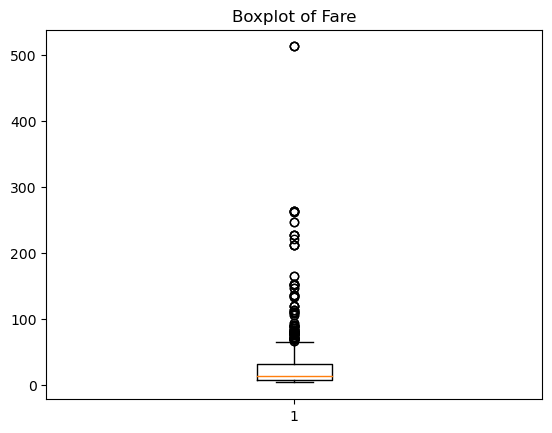

In [517]:
# Boxplot of 'Fare' column to check outliers
plt.boxplot(data['Fare'])

# plotting the title as "Boxplot of Fare"
plt.title("Boxplot of Fare")

# display figures
plt.show()

~ lot of outliers  present above the upper whisker of 'Fare' column 

First, Second and Third Quartile of 'Fare' column

In [518]:
# First Quartile of 'Fare' column
Q1_fare = np.percentile(data['Fare'], 25, interpolation='midpoint')
f"First Quartile of 'Fare' column = {Q1_fare}"

"First Quartile of 'Fare' column = 7.925"

In [519]:
# Second Quartile of 'Fare' column
Q2_fare = np.percentile(data['Fare'], 50, interpolation='midpoint')
f"Second Quartile of 'Fare' column = {Q2_fare}"

"Second Quartile of 'Fare' column = 14.5"

In [520]:
# Third Quartile of 'Fare' column
Q3_fare = np.percentile(data['Fare'], 75, interpolation='midpoint')
f"Third Quartile of 'Fare' column = {Q3_fare}"

"Third Quartile of 'Fare' column = 31.275"

In [521]:
# (interquartile range) IQR of  'Fare' column
IQR_fare = Q3_fare-Q1_fare
f"IQR of 'Fare' column = {IQR_fare}"

"IQR of 'Fare' column = 23.349999999999998"

find the lower whisker and upper whisker of 'Fare' column

In [522]:
# lower whisker of 'Fare' column
low_fare = Q1_fare-1.5*IQR_fare 
f"lower whisker of 'Fare' column = {low_fare}"

"lower whisker of 'Fare' column = -27.099999999999998"

In [523]:
# upper whisker of 'Fare' column
up_fare = Q3_fare+1.5*IQR_fare
f"upper whisker of 'Fare' column = {up_fare}"

"upper whisker of 'Fare' column = 66.3"

In [524]:
# to find the outliers  in 'Fare' column and display it
outlier_fare = [] 
for x_fare in data['Fare']:
    if((x_fare>up_fare) or (x_fare<low_fare)):
        outlier_fare.append(x_fare)
f"Outliers of 'Fare' column = {outlier_fare}"


"Outliers of 'Fare' column = [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]"

~ all the outliers  present above the upper whisker of 'Fare' column 

In [525]:
# to locate the index of the outliers in 'Fare' column
ind1_fare = (data['Fare']>up_fare)
ind1_fare

PassengerId
1      False
2       True
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Fare, Length: 891, dtype: bool

In [526]:
# locating the index of outliers in 'Fare' column
data.loc[ind1_fare].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

##### 'Outliers' in 'SibSp' column

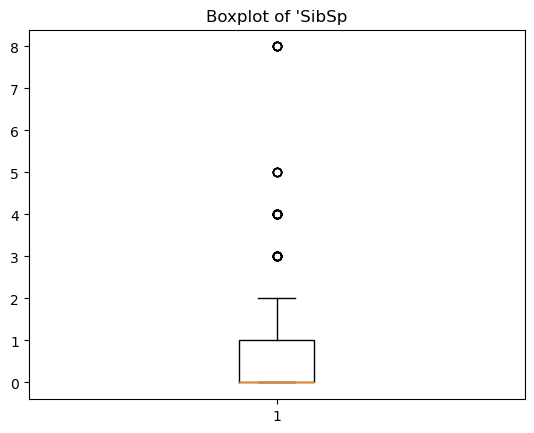

In [527]:
# Boxplot of 'SibSp' column to check outliers
plt.boxplot(data['SibSp'])

# plotting the title as "Boxplot of 'SibSp"
plt.title("Boxplot of 'SibSp")

# display figures
plt.show()

~ some outliers present above the upper whisker of 'SibSp' column

First, Second and Third Quartile of 'SibSp' column

In [528]:
# First Quartile of 'SibSp' column
Q1_sib = np.percentile(data['SibSp'], 25, interpolation='midpoint')
f"First Quartile of 'SibSp' column = {Q1_sib}"

"First Quartile of 'SibSp' column = 0.0"

In [529]:
# Second Quartile of 'SibSp' column
Q2_sib = np.percentile(data['SibSp'], 50, interpolation='midpoint')
f"Second Quartile of 'SibSp' column = {Q2_sib}"

"Second Quartile of 'SibSp' column = 0.0"

In [530]:
# Third Quartile of 'SibSp' column
Q3_sib = np.percentile(data['SibSp'], 75, interpolation='midpoint')
f"Third Quartile of 'SibSp' column = {Q3_sib}"

"Third Quartile of 'SibSp' column = 1.0"

In [531]:
# (interquartile range) IQR of  'SibSp' column
IQR_sib = Q3_sib-Q1_sib
f"IQR of 'SibSp' column = {IQR_sib}"

"IQR of 'SibSp' column = 1.0"

find the lower whisker and upper whisker of 'SibSp' column

In [532]:
# lower whisker of 'SibSp' column
low_sib = Q1_sib-1.5*IQR_sib 
f"lower whisker of 'SibSp' column = {low_sib}"

"lower whisker of 'SibSp' column = -1.5"

In [533]:
# upper whisker of 'SibSp' column
up_sib = Q3_sib+1.5*IQR_sib
f"upper whisker of 'SibSp' column = {up_sib}"

"upper whisker of 'SibSp' column = 2.5"

In [534]:
# to find the outliers  in 'SibSp' column and display it
outlier_sib = [] 
for x_sib in data['SibSp']:
    if((x_sib>up_sib) or (x_sib<low_sib)):
        outlier_sib.append(x_sib)
f"Outliers of 'SibSp' column = {outlier_sib}"


"Outliers of 'SibSp' column = [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]"

~ all the outliers  present above the upper whisker of 'SibSp' column

In [535]:
# count of null values in each column
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [536]:
# type of each column in the dataframe
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

~Name, Sex, Ticket, Embarked are of object types, categorical columns

### Encoding
~ Performing encoding on categorical columns like Name, Sex, Ticket, Embarked since machine learning model cannot accept categorical columns

In [537]:
# number of rows and columns of the dataframe 'data'
data.shape

(891, 10)

In [538]:
# number of unique values in 'Name' column
data['Name'].nunique() 

891

~ There are 891 rows, and 891  unique values in 'Name' column, hence each row is containing a unique Name.
Here all  the values in 'Name' column  are unique , so it will not contribute anything to the machine learning model. Not considering 'Name' column as a feature as it will not affect the target.

In [539]:
# number of unique values in 'Ticket' column
data['Ticket'].nunique() 

681

~There are 681 unique values in 'Ticket' column, so not considering 'Ticket' column as a feature as it will not affect the target.

In [540]:
# number of unique values in 'Sex' column
data['Sex'].nunique() 

2

In [541]:
# display the unique values in 'Sex' column
data['Sex'].unique()

array(['male', 'female'], dtype=object)

~There are 2 unique values in 'Sex' column, which is male and female present in descending order.

* 1) performing label encoding on categorical column 'Sex' since the values in 'Sex' column are present in descending order

In [542]:
# import label encoder present in preprocessing class of sklearn library
from sklearn.preprocessing import LabelEncoder

In [543]:
# creating an instance of LabelEncoder()
le = LabelEncoder() 

In [544]:
# display all columns present in the dataframe
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [545]:
# applying label encoder to 'Sex' column
# Fit label encoder and tranform the values, store encoded labels back to  'Sex' column
data['Sex'] = le.fit_transform(data['Sex']) 

In [546]:
# display the encoded labels in 'Sex' column
data['Sex']

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int32

* 2) performing one hot encoding on categorical column 'Embarked' column since there is no order for the values present in 'Embarked' column

In [547]:
# number of unique values in 'Embarked' column
data['Embarked'].nunique() 

3

In [548]:
# unique values present in 'Embarked' column
data['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

~There are 3 unique values in 'Embarked' column, so 3 new columns get created, when performing one hot encoding.

In [549]:
# performing one hot encoding on the column 'Embarked' and storing it in a variable 'data_embarked'
data_embarked=pd.get_dummies(data['Embarked'])

# displaying the contents of 'data_embarked'
data_embarked

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [550]:
# concatenating one series obtained by label encoding  with a dataframe obtained by one hot encoding
encoded = pd.concat([data['Sex'],data_embarked], axis=1)

# displaying the contents of concatenation
encoded

,Sex,C,Q,S
PassengerId,,,,
1,1,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
5,1,0,0,1
...,...,...,...,...
887,1,0,0,1
888,0,0,0,1
889,0,0,0,1


In [551]:
# count of null values in each column
encoded.isnull().sum()

Sex    0
C      0
Q      0
S      0
dtype: int64

In [552]:
# number of rows and columns in the dataframe
encoded.shape

(891, 4)

### Correlation

In [553]:
# display first 5 rows of the dataframe
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [554]:
# displaying the unique values in 'Pclass' column
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [555]:
# displaying the unique values in 'Age' column
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 19.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 24.  , 34.  , 15.  ,
       28.  ,  8.  , 18.  , 40.  , 66.  , 42.  , 21.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  ,  1.  , 17.  ,
       32.  , 16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [556]:
# displaying the unique values in 'SibSp' column
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [557]:
# displaying the unique values in 'Parch' column
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [558]:
# displaying the unique values in 'Fare' column
data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [559]:
# selecting some numerical variables for doing correlation
P = data[['Survived', 'Age', 'Parch', 'SibSp', 'Fare', 'Pclass']] 

In [560]:
# creating an instance for correlation
corrmatrix = P.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,Survived,Age,Parch,SibSp,Fare,Pclass
Survived,1.000000,-0.033816,0.081629,-0.035322,0.250383,-0.338481
Age,-0.033816,1.000000,-0.137775,-0.241226,0.121568,-0.375371
Parch,0.081629,-0.137775,1.000000,0.414838,0.211947,0.018443
SibSp,-0.035322,-0.241226,0.414838,1.000000,0.155271,0.083081
Fare,0.250383,0.121568,0.211947,0.155271,1.000000,-0.561542
Pclass,-0.338481,-0.375371,0.018443,0.083081,-0.561542,1.000000


~ From the above display: 

(a) 'Fare' column is having better positive correlation with 'Survived' column, when comparing the remaining columns.

(b) 'Pclass' column is having better negative correlation with 'Survived' column, when comparing the remaining columns.

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

* X = taking features as 'Pclass', 'Sex', 'Age', 'Parch', 'SibSp', 'Fare', 'Embarked' columns

* y = target as 'Survived' column

In [561]:
# preparing the dataframe containing only 'Age', 'Fare' columns to perform min max scaling
A = data.drop(['Survived', 'Pclass', 'Parch', 'SibSp', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1) 

In [562]:
# displaying the first 5 rows of the dataframe
A.head()

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833
3,26.0,7.9250
4,35.0,53.1000
5,35.0,8.0500


In [563]:
# importing MinMaxScaler present in preprocessing class of sklearn library
from sklearn.preprocessing import MinMaxScaler

In [564]:
# creating an instance for MinMaxScaler() and defining the range between 0 and 1 using feature_range
minmax = MinMaxScaler(feature_range=(0,1)) 

In [565]:
# Fit MinMaxScaler and tranform the scaled values to 'A1'
A1 = minmax.fit_transform(A)

# display the values of A1
A1

array([[0.27117366, 0.00636906],
       [0.4722292 , 0.13234033],
       [0.32143755, 0.00769697],
       ...,
       [0.22090978, 0.03823896],
       [0.32143755, 0.05112462],
       [0.39683338, 0.0073527 ]])

In [566]:
# to find the type of A1
type(A1)

numpy.ndarray

NOTE:-scaling will convert into an array, so describe() will not work.

With describe(), we can know what is the minimum and maximum value, for describe() to work convert it back to a dataframe

In [567]:
# converting back to a dataframe 
# by calling the DataFrame constructor and passing 'A1' which is in array format and giving the column names
A1 = pd.DataFrame(A1, columns=['Age', 'Fare'], index=pd.RangeIndex(start=1, stop=892, name='PassengerId'))

# index=pd.RangeIndex(start=1, stop=892, name='PassengerId')) - to have index from 1 to 891 and name the index as 'PassengerId'
# so that concatenation of the dataframes can be done

# display the values of A1
A1

,Age,Fare
PassengerId,,
1,0.271174,0.006369
2,0.472229,0.132340
3,0.321438,0.007697
4,0.434531,0.096569
5,0.434531,0.007943
...,...,...
887,0.334004,0.017681
888,0.233476,0.051125
889,0.220910,0.038239


In [568]:
# display the summary statistics of all numerical columns after performing minmax scaler
A1.describe()  

,Age,Fare
count,891.000000,891.000000
mean,0.340888,0.056415
std,0.173079,0.097600
min,0.000000,0.000000
25%,0.233476,0.007697
50%,0.296306,0.020632
75%,0.434531,0.053633
max,1.000000,1.000000


~Minimum value is zero and maximum value is one for all columns

* splitting the data into features and targets

-X indicates Fatures  = 'Pclass', 'Sex', 'Age', 'Parch', 'SibSp', 'Fare', 'Embarked' columns


-y indicates Target = 'Survived' column

In [569]:
# concatenating  encoded dataframes, scaled dataframes, 'Pclass', Parch','SibSp' columns to create the features
X = pd.concat([data['Sex'],data_embarked, A1, data['Pclass'], data['Parch'], data['SibSp']], axis=1) 

In [570]:
# displaying features
X

,Sex,C,Q,S,Age,Fare,Pclass,Parch,SibSp
PassengerId,,,,,,,,,
1,1,0,0,1,0.271174,0.006369,3,0,1
2,0,1,0,0,0.472229,0.132340,1,0,1
3,0,0,0,1,0.321438,0.007697,3,0,0
4,0,0,0,1,0.434531,0.096569,1,0,1
5,1,0,0,1,0.434531,0.007943,3,0,0
...,...,...,...,...,...,...,...,...,...
887,1,0,0,1,0.334004,0.017681,2,0,0
888,0,0,0,1,0.233476,0.051125,1,0,0
889,0,0,0,1,0.220910,0.038239,3,2,1


In [571]:
# store the values of 'Survived' column which is the target in a variable
y = data['Survived']

# display the contents of the variable
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64